# Reproduce the HRDs by Lindegren showing the effect of the RUWE

Reproduce the figures on slides 41 to 46 of the [presentation](https://www.cosmos.esa.int/documents/29201/1770596/Lindegren_GaiaDR2_Astrometry_extended.pdf/1ebddb25-f010-6437-cb14-0e360e2d9f09) by L. Lindegren on the renormalized unit weight error (RUWE) for Gaia DR2 astrometry.

The query for the input data is:
```
select source_id, bp_rp, phot_g_mean_mag, parallax, 
sqrt(astrometric_chi2_al/(astrometric_n_good_obs_al-5)) as u
from gaiadr2.gaia_source
where parallax>10
and parallax_over_error>10
and phot_bp_mean_flux_over_error>10
and phot_rp_mean_flux_over_error>10
```

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.table import Table

#from agabpylib.plotting.plotstyles import useagab, apply_tufte
from ruwetools import U0Interpolator

In [3]:
alldata = Table.read('ruwe-test-data.fits', format='fits')
print("Number of sources in input table: {0}".format(alldata['bp_rp'].size))

gabs = alldata['phot_g_mean_mag']+5*np.log10(alldata['parallax'])-10

rwi = U0Interpolator('table_u0_g_col.txt',
                    'table_u0_g.txt')
ruwe = alldata['u']/rwi.get_u0(alldata['phot_g_mean_mag'], alldata['bp_rp'])

Number of sources in input table: 338833


## Raw HRD, no UWE or RUWE filtering

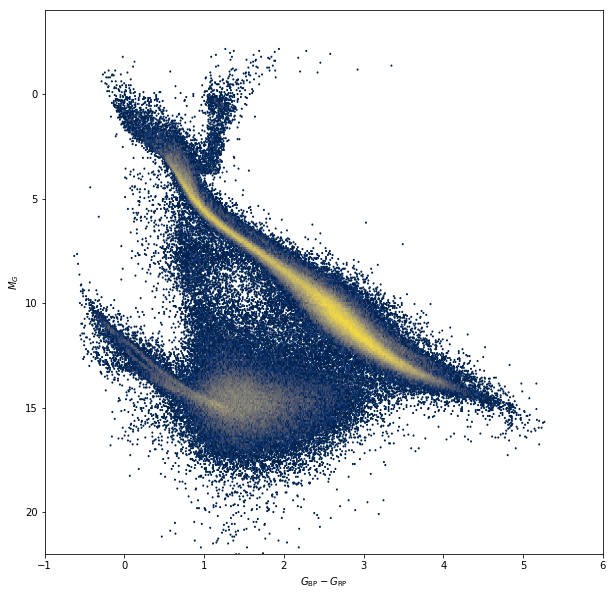

In [6]:
#useagab(usetex=False, fontfam='sans')
figa, axa = plt.subplots(1, 1, figsize=(10,10))
#apply_tufte(axa)

axa.hexbin(alldata['bp_rp'], gabs, mincnt=1, bins='log', gridsize=500, cmap='cividis')
axa.set_xlabel(r'$G_\mathrm{BP}-G_\mathrm{RP}$')
axa.set_ylabel(r'$M_G$')
axa.set_xlim(-1,6)
axa.set_ylim(-4,22)
axa.invert_yaxis()

plt.show()

## UWE and RUWE histograms

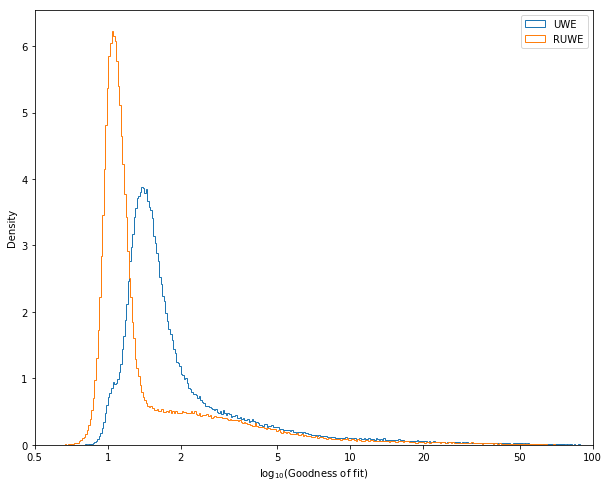

In [7]:
figb, axb = plt.subplots(1, 1, figsize=(10,8))
#apply_tufte(axb, withgrid=True)

axb.hist(np.log10(alldata['u']), bins='auto', histtype='step', density=True, label='UWE')
axb.hist(np.log10(ruwe), bins='auto', histtype='step', density=True, label='RUWE')
axb.legend(loc='best')
axb.set_xticks(np.log10([0.5,1,2,5,10,20,50,100]), minor=False)
axb.set_xticklabels(['0.5','1','2','5','10','20','50','100'], minor=False)
axb.set_xlabel('$\log_{10}(\mathrm{Goodness\ of\ fit})$')
axb.set_ylabel('Density')
axb.set_xlim(np.log10(0.5),np.log10(100))

plt.show()

## HR diagrams with UWE/RUWE filtering

In [10]:
figc, (axc, axd) = plt.subplots(1, 2, figsize=(16,9))
#apply_tufte(axc)
#apply_tufte(axd)

photometry = 
uwefilter = alldata['u']<1.96
ruwefilter = ruwe<1.40
uwefilterC1 = alldata['u']< 1.2 * np.max(1, np.exp(-0.2*(alldata['phot_g_mean_mag'] - 19.5))

axc.hexbin(alldata['bp_rp'][uwefilter], gabs[uwefilter], mincnt=1, bins='log', gridsize=500, cmap='cividis')
axc.set_xlabel(r'$G_\mathrm{BP}-G_\mathrm{RP}$')
axc.set_ylabel(r'$M_G$')
axc.set_xlim(-1,6)
axc.set_ylim(-4,22)
axc.invert_yaxis()
axc.set_title('UWE$<1.96$')

axd.hexbin(alldata['bp_rp'][ruwefilter], gabs[ruwefilter], mincnt=1, bins='log', gridsize=500, cmap='cividis')
axd.set_xlabel(r'$G_\mathrm{BP}-G_\mathrm{RP}$')
axd.set_ylabel(r'$M_G$')
axd.set_xlim(-1,6)
axd.set_ylim(-4,22)
axd.invert_yaxis()
axd.set_title('RUWE$<1.40$')

print('Number of source with UWE<1.96: {0}'.format(gabs[uwefilter].size))
print('Number of source with RUWE<1.40: {0}'.format(gabs[ruwefilter].size))

plt.show()

SyntaxError: invalid syntax (<ipython-input-10-20415fc1d6d0>, line 5)

Number of source with UWE<1.96, RUWE>=1.4: 14982
Number of source with RUWE<1.40, UWE>=1.96: 15275


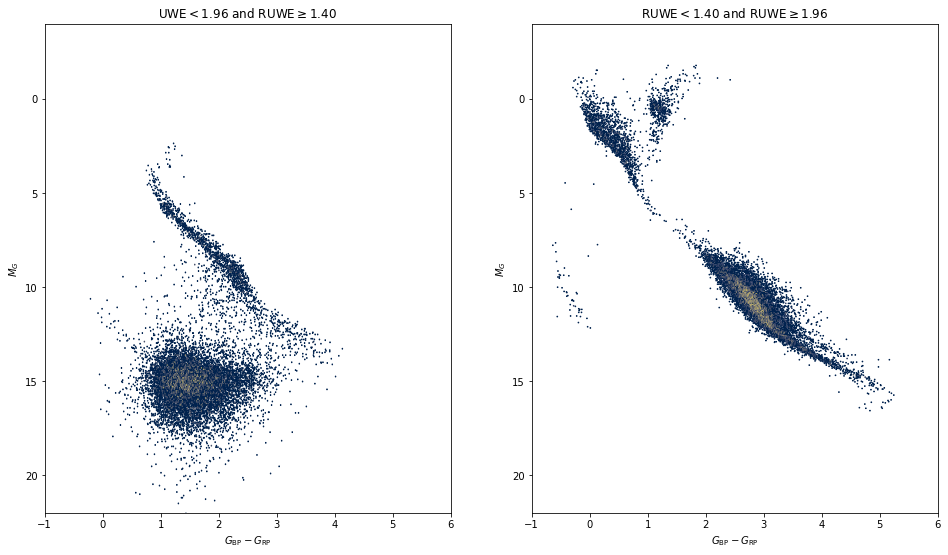

In [9]:
figd, (axe, axf) = plt.subplots(1, 2, figsize=(16,9))
#apply_tufte(axe)
#apply_tufte(axf)

filterA = (alldata['u']<1.96) & (ruwe>=1.4)
filterB = (ruwe<1.40) & (alldata['u']>=1.96)

axe.hexbin(alldata['bp_rp'][filterA], gabs[filterA], mincnt=1, bins='log', gridsize=500, cmap='cividis')
axe.set_xlabel(r'$G_\mathrm{BP}-G_\mathrm{RP}$')
axe.set_ylabel(r'$M_G$')
axe.set_xlim(-1,6)
axe.set_ylim(-4,22)
axe.invert_yaxis()
axe.set_title('UWE$<1.96$ and RUWE$\geq1.40$')

axf.hexbin(alldata['bp_rp'][filterB], gabs[filterB], mincnt=1, bins='log', gridsize=500, cmap='cividis')
axf.set_xlabel(r'$G_\mathrm{BP}-G_\mathrm{RP}$')
axf.set_ylabel(r'$M_G$')
axf.set_xlim(-1,6)
axf.set_ylim(-4,22)
axf.invert_yaxis()
axf.set_title('RUWE$<1.40$ and RUWE$\geq1.96$')

print('Number of source with UWE<1.96, RUWE>=1.4: {0}'.format(gabs[filterA].size))
print('Number of source with RUWE<1.40, UWE>=1.96: {0}'.format(gabs[filterB].size))

plt.show()